In [1]:
#-*- encoding:utf-8 -*-
%matplotlib inline
"""
展示如何执行策略回测。
"""
from __future__ import division
import re
import datetime
import sys
import numpy as np
import pandas as pd
import talib as tb

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.ctaBase import loadContractDetail

def run_backtesting(strategy_name, symbol, start_date, end_date,
                  setting_dict={},slip=1, rate=0.3/10000):
    """运行单标的回测""" 
    con_d = loadContractDetail(symbol)
    size = con_d['trade_size']
    price_tick = con_d['price_tick']
    slippage = slip * price_tick       #默认滑点为一个跳价
    rate = rate                        #默认手续费万分之0.3
    
    #--------------------------------------------------
    #载入策略类
    file_name = 'strategy' + strategy_name.replace('Strategy', '')
    file_name = 'vnpy.trader.app.ctaStrategy.strategy.{}'.format(file_name)
    import_file = 'from {} import {}'.format(file_name, strategy_name)
    #如果模块已经载入，删除已经存在的模块
    if file_name in sys.modules.keys():
        del sys.modules[file_name]
        
    exec(import_file)
    strategy_moudle = eval(strategy_name)
    
    #--------------------------------------------------
    # 创建回测引擎
    engine = BacktestingEngine()
    # 设置引擎的回测模式为K线
    engine.setBacktestingMode(engine.BAR_MODE)
    # 设置回测用的数据起始日期
    engine.setStartDate(start_date)
    engine.setEndDate(end_date)
    # 设置产品相关参数
    engine.setSlippage(slippage)      # 滑点
    engine.setRate(rate)              # 手续费
    engine.setSize(size)              # 股指合约大小 
    engine.setPriceTick(price_tick)   # 股指最小价格变动
    # 设置使用的历史数据库
    engine.setDatabase(MINUTE_DB_NAME, symbol)
    # 在引擎中创建策略对象
    engine.initStrategy(strategy_moudle, setting_dict)
    # 开始跑回测
    engine.runBacktesting()
    df = engine.calculateDailyResult()
    #显示单策略每笔回测结果
    engine.showBacktestingResult()
    
    return df

def concat_dataframe(data_1, data_2):
    '''把两个dataframe重合部分相加，不重合部分拼接'''
    d_dup = data_1 + data_2
    d_dup = d_dup.dropna()
    d_1 = data_1.drop(d_dup.index)
    d_2 = data_2.drop(d_dup.index)
    new_data = pd.concat([d_1, d_dup, d_2])
    new_data.sort_index(ascending=True, inplace=True)
    #每日收盘价
    closePrice = pd.concat([d_1, data_2]).closePrice
    new_data['closePrice'] = closePrice
    
    return new_data

def show_portfolio_daily_result(dfp, capital=1000000):
    # 注意如果被抛弃的交易日位于回测的前后，即两者不重合的日期中，则不会影响组合曲线正确性
    # 但是如果被抛弃的交易日位于回测的中部，即两者重合的日期中，组合曲线会出现错误（丢失交易日）
    #如果是多个结果拼接[df1, df2, df3]
    if isinstance(dfp, list):
        dfp = reduce(concat_dataframe, dfp)
        
    dfp = dfp.dropna()   
    # 创建回测引擎，并设置组合回测初始资金后，显示结果
    engine = BacktestingEngine()
    engine.setCapital(capital)
    dfp, result = engine.calculateDailyStatistics(dfp)
    engine.showDailyResult(dfp, result)
    

2019-02-21 10:35:38.700044	开始载入数据
2019-02-21 10:35:38.782101	载入完成，数据量：337062
2019-02-21 10:35:38.782758	开始回测
2019-02-21 10:35:38.789919	策略初始化完成
2019-02-21 10:35:38.789975	策略启动完成
2019-02-21 10:35:38.789998	开始回放数据
2014-12-11 09:22:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2014-12-11 09:29:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 09:30:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 10:46:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 11:14:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 14:00:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 14:16:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 14:20:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 14:23:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 14:40:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-11 14:42:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:7
2014-12-12 10:33:00, DoubleMa

2015-01-13 11:08:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:09:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:10:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:11:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:12:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:13:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:14:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:15:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:16:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:17:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:18:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:19:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:20:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:21:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:27
2015-01-13 11:22:00,

2015-01-14 23:23:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:24:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:25:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:26:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:27:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:28:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:29:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:30:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:31:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:32:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:33:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:34:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:35:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:36:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:29
2015-01-14 23:37:00,

2015-01-16 21:10:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:11:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:12:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:13:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:14:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:15:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:16:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:18:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:20:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:21:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:22:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:23:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:24:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:25:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:31
2015-01-16 21:26:00,

2015-01-20 13:49:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:50:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:51:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:54:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:56:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:57:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:58:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 13:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 14:01:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 14:02:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 14:03:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:32
2015-01-20 14:04:00,

2015-01-22 09:49:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 09:50:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 09:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 09:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 09:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 09:57:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 09:58:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 09:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 10:01:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 10:04:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 10:05:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 10:06:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 10:07:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 10:08:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:34
2015-01-22 10:09:00,

2015-01-26 09:43:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:44:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:45:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:46:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:49:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:50:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:51:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:54:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:56:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:36
2015-01-26 09:57:00,

2015-01-28 10:05:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:06:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:07:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:08:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:09:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:10:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:11:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:12:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:30:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:31:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:33:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:34:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:35:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:36:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:38
2015-01-28 10:37:00,

2015-01-30 10:36:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:37:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:38:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:42:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:45:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:50:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:56:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:57:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 10:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 11:00:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 11:01:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:40
2015-01-30 11:02:00,

2015-02-03 00:23:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:27:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:29:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:30:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:32:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:34:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:35:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:37:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:38:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:41:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:43:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:44:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:42
2015-02-03 00:49:00,

2015-02-04 21:58:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 21:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:00:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:01:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:02:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:03:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:04:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:05:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:06:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:07:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:08:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:09:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:10:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:11:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:44
2015-02-04 22:12:00,

2015-02-06 13:34:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:35:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:36:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:37:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:38:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:39:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:40:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:41:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:42:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:44:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:45:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:46:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:45
2015-02-06 13:49:00,

2015-02-10 13:46:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:49:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:51:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:54:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:56:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:57:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:58:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 13:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 14:00:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:47
2015-02-10 14:01:00,

2015-02-12 21:06:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:07:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:08:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:09:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:10:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:11:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:12:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:13:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:14:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:15:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:16:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:17:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:18:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:19:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:50
2015-02-12 21:20:00,

2015-02-16 10:37:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:38:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:39:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:40:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:41:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:42:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:43:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:44:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:45:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:46:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:51
2015-02-16 10:54:00,

2015-02-25 13:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:50:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:51:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:54:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:56:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:57:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:58:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 13:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 14:00:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 14:01:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 14:02:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:53
2015-02-25 14:03:00,

2015-02-26 22:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 22:56:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 22:57:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 22:58:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 22:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:00:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:01:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:02:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:03:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:04:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:07:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:08:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:09:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:10:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:55
2015-02-26 23:11:00,

2015-03-02 09:22:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:23:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:24:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:25:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:26:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:27:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:28:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:29:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:30:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:31:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:32:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:33:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:34:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:35:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:56
2015-03-02 09:36:00,

当前已经储存Daily分钟K线数量:57
2015-03-03 13:36:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:37:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:38:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:39:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:40:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:41:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:42:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:43:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:44:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:45:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:46:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57
2015-03-03 13:49:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:57

2015-03-04 22:12:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:13:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:14:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:15:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:16:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:17:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:18:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:19:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:20:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:21:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:22:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:23:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:24:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:25:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:59
2015-03-04 22:26:00,

当前已经储存Daily分钟K线数量:60
2015-03-05 23:41:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:42:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:43:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:44:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:45:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:46:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:49:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:50:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:54:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60
2015-03-05 23:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:60

2015-03-09 10:06:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:07:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:08:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:09:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:10:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:11:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:12:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:13:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:14:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:30:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:31:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:32:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:33:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:34:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:61
2015-03-09 10:35:00,

2015-03-10 22:46:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:47:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:48:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:49:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:50:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:51:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:54:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:56:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:57:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:58:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 22:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:63
2015-03-10 23:00:00,

2015-03-12 09:51:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 09:52:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 09:53:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 09:54:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 09:55:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 09:57:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 09:58:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 09:59:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 10:00:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 10:01:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 10:02:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 10:03:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 10:04:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 10:05:00, DoubleMaStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:64
2015-03-12 10:06:00,

2019-02-21 10:36:07.541039	数据回放结束
2019-02-21 10:36:07.541102	计算按日统计结果
2019-02-21 10:36:07.552241	计算回测结果
2019-02-21 10:36:07.552741	------------------------------
2019-02-21 10:36:07.552862	第一笔交易：	2015-03-31 21:02:00
2019-02-21 10:36:07.552914	最后一笔交易：	2018-08-31 22:59:00
2019-02-21 10:36:07.552962	总交易次数：	14.0
2019-02-21 10:36:07.553002	总盈亏：	69,897.33
2019-02-21 10:36:07.553039	最大回撤: 	-6,918.95
2019-02-21 10:36:07.553066	平均每笔盈利：	4,992.67
2019-02-21 10:36:07.553090	平均每笔滑点：	120.0
2019-02-21 10:36:07.553116	平均每笔佣金：	4.48
2019-02-21 10:36:07.553140	胜率		42.86%
2019-02-21 10:36:07.553164	盈利交易平均值	14,225.46
2019-02-21 10:36:07.554111	亏损交易平均值	-1,931.93
2019-02-21 10:36:07.554145	盈亏比：	7.36
2019-02-21 10:36:07.564856	------------------------------
2019-02-21 10:36:07.564944	首个交易日：	2014-12-11
2019-02-21 10:36:07.564991	最后交易日：	2018-08-31
2019-02-21 10:36:07.565036	总交易日：	969
2019-02-21 10:36:07.565066	盈利交易日	450
2019-02-21 10:36:07.565085	亏损交易日：	426
2019-02-21 10:36:07.565103	起始资金：	1000000
2019-02-21 10

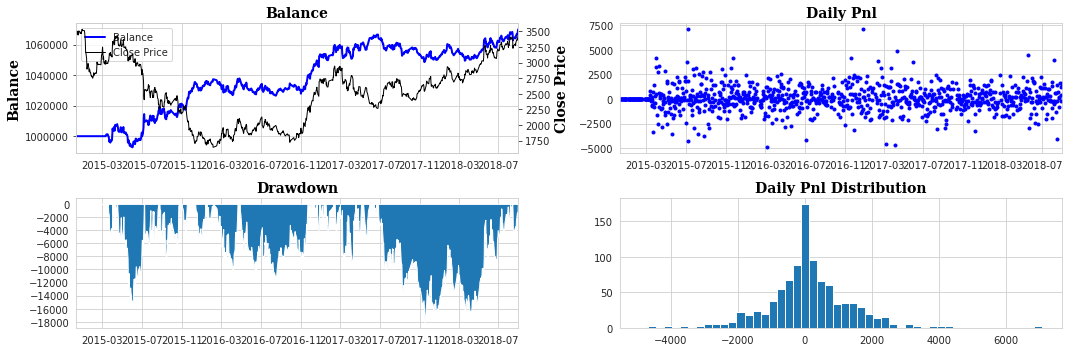

In [43]:
strategy = 'DoubleMaStrategy'
start_date = '20141201'
end_date = '20180901'
symbol = 'bu000'
setting_dict =     {
        "className": "DoubleMaStrategy", 
        "name": "DoubleMaStrategy_bu_Daily", 
        "vtSymbol": "bu1906",
        "alpha": "bu",
        "shortNum": 10,
        "diffNum": 55,
        "initDays": 120,
        "timePeriod": "Daily",
        "fixedSize": 3,
    }
df1 = run_backtesting(strategy, symbol, start_date, end_date, setting_dict)
show_portfolio_daily_result(df1)

2019-02-21 10:39:34.916263	开始载入数据
2019-02-21 10:39:35.151802	载入完成，数据量：385334
2019-02-21 10:39:35.152559	开始回测
2019-02-21 10:39:35.156832	策略初始化完成
2019-02-21 10:39:35.156914	策略启动完成
2019-02-21 10:39:35.156935	开始回放数据
2015-03-27 09:00:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:01:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:02:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:03:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:04:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:05:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:06:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:07:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:08:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:09:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:10:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-27 09:11:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:0
2015-03-

2015-03-30 21:00:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:01:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:02:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:03:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:04:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:05:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:06:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:07:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:08:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:09:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:10:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:11:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:12:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:13:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30 21:14:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:46
2015-03-30

当前已经储存15分钟K线数量:86
2015-03-31 23:30:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:31:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:32:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:33:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:34:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:35:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:36:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:37:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:38:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:39:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:40:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:41:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:42:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:43:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:87
2015-03-31 23:44:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟

2015-04-02 11:19:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:20:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:21:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:22:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:23:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:24:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:25:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:26:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:27:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:28:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 11:29:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:132
2015-04-02 13:30:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:133
2015-04-02 13:31:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:133
2015-04-02 13:32:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量:133
2015-04-02 13:33:00, BollFltStrategy策略, 初始化天数不足
当前已经储存15分钟K线数量

2019-02-21 10:40:08.622340	数据回放结束
2019-02-21 10:40:08.622402	计算按日统计结果
2019-02-21 10:40:08.633822	计算回测结果
2019-02-21 10:40:08.638984	------------------------------
2019-02-21 10:40:08.639038	第一笔交易：	2015-04-14 23:48:00
2019-02-21 10:40:08.639063	最后一笔交易：	2018-09-01 00:59:00
2019-02-21 10:40:08.639090	总交易次数：	236.0
2019-02-21 10:40:08.639115	总盈亏：	61,277.6
2019-02-21 10:40:08.639144	最大回撤: 	-8,134.59
2019-02-21 10:40:08.639618	平均每笔盈利：	259.65
2019-02-21 10:40:08.639676	平均每笔滑点：	20.0
2019-02-21 10:40:08.639720	平均每笔佣金：	5.22
2019-02-21 10:40:08.639744	胜率		35.59%
2019-02-21 10:40:08.639767	盈利交易平均值	2,010.91
2019-02-21 10:40:08.640164	亏损交易平均值	-708.15
2019-02-21 10:40:08.640192	盈亏比：	2.84
2019-02-21 10:40:08.648926	------------------------------
2019-02-21 10:40:08.649033	首个交易日：	2015-03-27
2019-02-21 10:40:08.649057	最后交易日：	2018-09-01
2019-02-21 10:40:08.649078	总交易日：	995
2019-02-21 10:40:08.649097	盈利交易日	335
2019-02-21 10:40:08.649117	亏损交易日：	377
2019-02-21 10:40:08.649136	起始资金：	1000000
2019-02-21 10:40:08

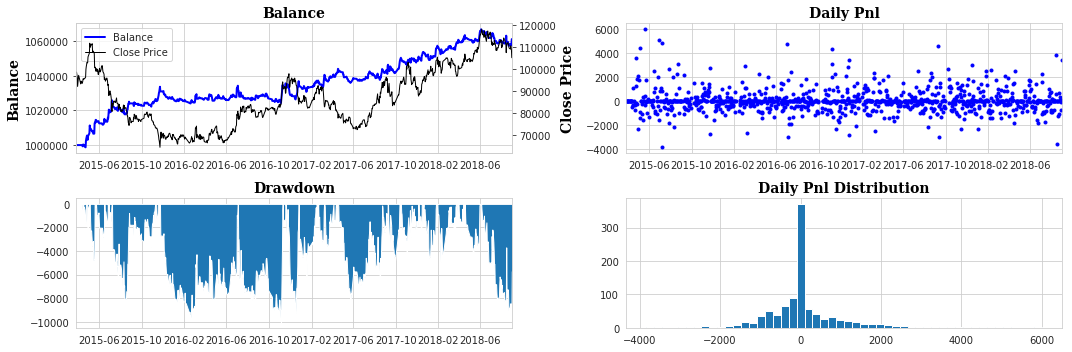

In [46]:
strategy = 'BollFltStrategy'
start_date = '20141201'
end_date = '20180901'
symbol = 'ni000'
setting_dict ={
        "className": "BollFltStrategy", 
        "name": "BollFltStrategy_ni_15min", 
        "vtSymbol": "ni1905",
        "alpha": "ni",
        "midNum": 110,
        "stdNum": 1.2,
        "diffNum": 50,
        "initDays": 90,
        "timePeriod": 15,
        "fixedSize": 1
    }
df1 = run_backtesting(strategy, symbol, start_date, end_date, setting_dict)
show_portfolio_daily_result(df1)

2019-02-20 17:24:43.484415	开始载入数据
2019-02-20 17:24:43.525258	载入完成，数据量：68596
2019-02-20 17:24:43.525848	开始回测
2019-02-20 17:24:43.620285	策略初始化完成
2019-02-20 17:24:43.620366	策略启动完成
2019-02-20 17:24:43.620389	开始回放数据
2017-12-11 09:00:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:01:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:02:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:03:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:04:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:05:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:06:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:07:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:08:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:09:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:6
2017-12-11 09:10:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量

2017-12-13 13:37:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:38:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:39:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:40:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:41:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:42:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:43:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:44:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:45:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:46:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:47:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:48:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:49:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:8
2017-12-13 13:50:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分

2017-12-15 14:21:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:22:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:23:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:24:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:25:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:26:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:27:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:28:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:29:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:30:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:31:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:32:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:33:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:10
2017-12-15 14:34:00, TrendTunnelStrategy策略, 初始化天数不足

2017-12-19 21:13:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:14:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:15:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:16:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:17:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:18:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:19:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:20:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:21:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:22:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:23:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:24:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:25:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:13
2017-12-19 21:26:00, TrendTunnelStrategy策略, 初始化天数不足

2017-12-21 21:05:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:06:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:07:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:08:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:09:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:10:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:11:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:12:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:13:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:14:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:15:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:16:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:17:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:15
2017-12-21 21:18:00, TrendTunnelStrategy策略, 初始化天数不足

2017-12-25 21:20:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:21:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:22:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:23:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:24:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:25:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:26:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:27:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:28:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:29:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:30:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:31:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:32:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:17
2017-12-25 21:33:00, TrendTunnelStrategy策略, 初始化天数不足

当前已经储存Daily分钟K线数量:18
2017-12-27 14:56:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:18
2017-12-27 14:57:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:18
2017-12-27 14:58:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:18
2017-12-27 14:59:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:18
2017-12-27 21:00:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:18
2017-12-27 21:01:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:19
2017-12-27 21:02:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:19
2017-12-27 21:03:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:19
2017-12-27 21:04:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:19
2017-12-27 21:05:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:19
2017-12-27 21:06:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:19
2017-12-27 21:07:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:19
2017-12-27 21:08:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:19
2017-12-27 21:09:00, TrendTunn

2017-12-29 14:59:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:20
2018-01-02 09:00:00, TrendTunnelStrategy策略, 初始化天数不足
当前已经储存Daily分钟K线数量:20
2019-02-20 17:24:51.137562	数据回放结束
2019-02-20 17:24:51.137624	计算按日统计结果
2019-02-20 17:24:51.141632	计算回测结果
2019-02-20 17:24:51.142945	------------------------------
2019-02-20 17:24:51.143042	第一笔交易：	2018-01-04 10:01:00
2019-02-20 17:24:51.143068	最后一笔交易：	2018-08-30 14:01:00
2019-02-20 17:24:51.143097	总交易次数：	58.0
2019-02-20 17:24:51.143121	总盈亏：	-8,738.66
2019-02-20 17:24:51.143146	最大回撤: 	-19,585.48
2019-02-20 17:24:51.143170	平均每笔盈利：	-150.67
2019-02-20 17:24:51.143615	平均每笔滑点：	200.0
2019-02-20 17:24:51.143640	平均每笔佣金：	5.84
2019-02-20 17:24:51.143663	胜率		27.59%
2019-02-20 17:24:51.143686	盈利交易平均值	2,244.15
2019-02-20 17:24:51.143707	亏损交易平均值	-1,062.98
2019-02-20 17:24:51.144011	盈亏比：	2.11
2019-02-20 17:24:51.151357	------------------------------
2019-02-20 17:24:51.151411	首个交易日：	2017-12-11
2019-02-20 17:24:51.151436	最后交易日：	2018-08-31
2019-02-20 17:24:51.1

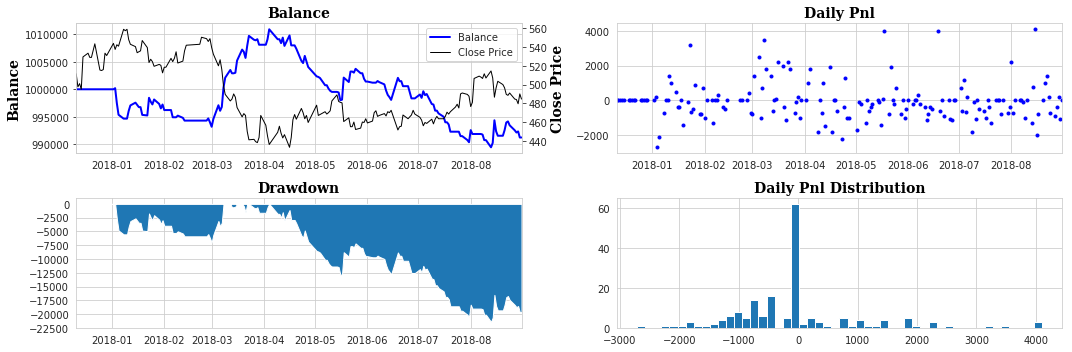

In [36]:
strategy = 'TrendTunnelStrategy'
start_date = '20171201'
end_date = '20180901'
symbol = 'i9000'
setting_dict ={
          "className": "TrendTunnelStrategy", 
          "name": "TrendTunnelStrategy_TA_30min", 
          "vtSymbol": "TA905", 
          "alpha": "TA", 
          "fixedSize": 2, 
          "initDays": 50, 
          "closePeriod": 30, 
          "openPeriod": 30, 
          "tradeMode": -1
    }
df1 = run_backtesting(strategy, symbol, start_date, end_date, setting_dict)
show_portfolio_daily_result(df1)

2019-02-21 10:38:23.688898	开始载入数据
2019-02-21 10:38:23.821754	载入完成，数据量：58229
2019-02-21 10:38:23.822454	开始回测
2019-02-21 10:38:23.867235	策略初始化完成
2019-02-21 10:38:23.867457	策略启动完成
2019-02-21 10:38:23.867483	开始回放数据
2019-02-21 10:38:30.487008	数据回放结束
2019-02-21 10:38:30.487091	计算按日统计结果
2019-02-21 10:38:30.492076	计算回测结果
2019-02-21 10:38:30.495050	------------------------------
2019-02-21 10:38:30.495254	第一笔交易：	2016-01-19 14:58:00
2019-02-21 10:38:30.495280	最后一笔交易：	2016-12-29 11:25:00
2019-02-21 10:38:30.495311	总交易次数：	119.0
2019-02-21 10:38:30.495335	总盈亏：	151,339.19
2019-02-21 10:38:30.495602	最大回撤: 	-29,000.31
2019-02-21 10:38:30.495645	平均每笔盈利：	1,271.76
2019-02-21 10:38:30.495668	平均每笔滑点：	151.26
2019-02-21 10:38:30.495691	平均每笔佣金：	72.95
2019-02-21 10:38:30.495721	胜率		55.46%
2019-02-21 10:38:30.495747	盈利交易平均值	5,238.18
2019-02-21 10:38:30.495770	亏损交易平均值	-3,667.56
2019-02-21 10:38:30.496213	盈亏比：	1.43
2019-02-21 10:38:30.504223	------------------------------
2019-02-21 10:38:30.504304	首个交易日：	2016-01

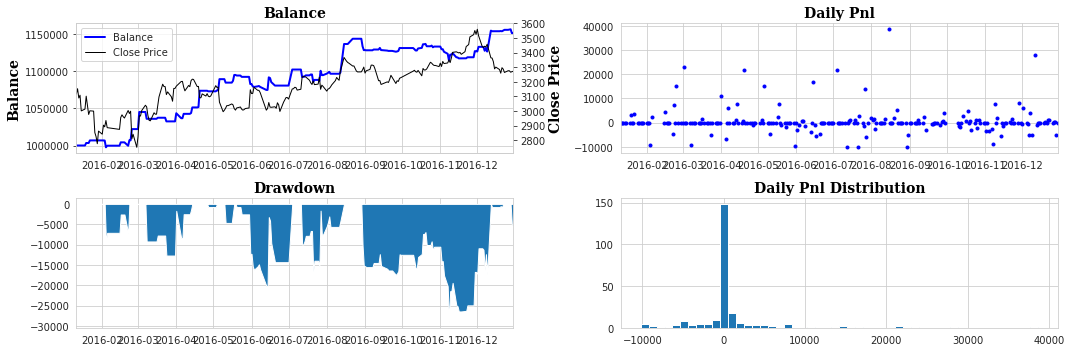

In [45]:
strategy = 'MarketStableStrategy'
start_date = '20160101'
end_date = '20170101'
symbol = 'IF000'
setting_dict ={
            "className": "MarketStableStrategy", 
            "name": "MarketStableStrategy_IF_1min", 
            "vtSymbol": "IF1903"
    }
df1 = run_backtesting(strategy, symbol, start_date, end_date, setting_dict)
show_portfolio_daily_result(df1)


In [2]:
tb.MA(data.close, timeperiod=14)

datetime
2010-06-30 15:14:00            NaN
2010-07-01 15:14:00            NaN
2010-07-02 15:14:00            NaN
2010-07-05 15:14:00            NaN
2010-07-06 15:14:00            NaN
2010-07-07 15:14:00            NaN
2010-07-08 15:14:00            NaN
2010-07-09 15:14:00            NaN
2010-07-12 15:14:00            NaN
2010-07-13 15:14:00            NaN
2010-07-14 15:14:00            NaN
2010-07-15 15:14:00            NaN
2010-07-16 15:14:00            NaN
2010-07-19 15:14:00    2611.428571
2010-07-20 15:14:00    2623.142857
2010-07-21 15:14:00    2637.171429
2010-07-22 15:14:00    2653.871429
2010-07-23 15:14:00    2671.700000
2010-07-26 15:14:00    2688.000000
2010-07-27 15:14:00    2702.685714
2010-07-28 15:14:00    2725.128571
2010-07-29 15:14:00    2741.128571
2010-07-30 15:14:00    2756.042857
2010-08-02 15:14:00    2777.214286
2010-08-03 15:14:00    2792.042857
2010-08-04 15:14:00    2811.114286
2010-08-05 15:14:00    2827.557143
2010-08-06 15:14:00    2843.628571
2010-08-09 

In [4]:
data.close[1:15].mean()

2623.1428571428573